<a href="https://colab.research.google.com/github/GiulianoPepato/Training/blob/main/spfc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ambiente

In [3]:
!pip install pandas lxml requests

In [4]:
from io import StringIO
import pandas as pd
import requests
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

# Método com uma temporada

In [ ]:
brasileirao = pd.DataFrame()

In [ ]:
url = "https://en.wikipedia.org/wiki/2007_S%C3%A3o_Paulo_FC_season"

print("Acessando a página de forma disfarçada...")

# Criamos um "cabeçalho" (header) simulando que estamos acessando do Google Chrome no Windows
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

try:
    # 1. Primeiro, fazemos o download da página usando a biblioteca 'requests' com o nosso disfarce
    resposta = requests.get(url, headers=headers)

    # 2. Verificamos se o site permitiu o acesso (código 200 significa OK)
    if resposta.status_code == 200:

        # 3. Agora passamos o HTML (texto) da página para o pandas ler as tabelas
        # Como estamos usando StringIO, evitamos avisos (warnings) em versões mais novas do Pandas

        html_string = StringIO(resposta.text)

        tabelas = pd.read_html(html_string)

        print(f"Sucesso! Foram encontradas {len(tabelas)} tabelas na página.\n")

        for i, tabela in enumerate(tabelas):
            # Filtra para mostrar apenas tabelas que parecem ser de jogos
            if len(tabela.columns) >= 3 and len(tabela) > 1:
                print(f"--- Tabela Índice [{i}] ---")
                print("Colunas:", list(tabela.columns))
                print(tabela.head(2)) # Mostra as 2 primeiras linhas
                print("-" * 40 + "\n")

    else:
        print(f"O servidor ainda recusou. Código de erro: {resposta.status_code}")

except Exception as e:
    print(f"Ocorreu um erro ao tentar ler as tabelas: {e}")

In [ ]:
ind = 45
for i in range(ind,ind+38):
  partida = tabelas[i].iloc[[0]].copy() # Pega a primeira linha como um DataFrame de uma linha
  brasileirao = pd.concat([brasileirao, partida], ignore_index=True)

In [ ]:
brasileirao = brasileirao.rename(columns={0: 'data e rodada', 1: 'casa',
                                  2: 'placar', 3: 'visitante', 4: 'cidade'})

# Método com todos os anos

In [23]:
primeiras_tabelas = [41,45,43,50,51,46,51,63,50,52,57,46,45,37,40,52,56,48,48,51]

brasileirao = pd.DataFrame()

for ano, indice in zip(range(2006,2026), primeiras_tabelas):
  print(f'Estamos no ano {ano}')
  url = "https://en.wikipedia.org/wiki/" + str(ano) + "_S%C3%A3o_Paulo_FC_season"
  print("Acessando a página de forma disfarçada...")




  # Criamos um "cabeçalho" (header) simulando que estamos acessando do Google Chrome no Windows
  headers = {
      "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
  }

  try:
      # 1. Primeiro, fazemos o download da página usando a biblioteca 'requests' com o nosso disfarce
    resposta = requests.get(url, headers=headers)

      # 2. Verificamos se o site permitiu o acesso (código 200 significa OK)
    if resposta.status_code == 200:

          # 3. Agora passamos o HTML (texto) da página para o pandas ler as tabelas
          # Como estamos usando StringIO, evitamos avisos (warnings) em versões mais novas do Pandas

      html_string = StringIO(resposta.text)

      tabelas = pd.read_html(html_string)

      print(f"Sucesso! Acessando as tabelas de {indice} até {indice+37} na página.\n")


      for i in range(indice,indice+38):
        partida = tabelas[i].iloc[[0]].copy() # Pega a primeira linha como um DataFrame de uma linha
        brasileirao = pd.concat([brasileirao, partida], ignore_index=True)


      time.sleep(1.5)


    else:
      print(f"O servidor ainda recusou. Código de erro: {resposta.status_code}")

  except Exception as e:
      print(f"Ocorreu um erro ao tentar ler as tabelas: {e}")
      break

print('Extração dos dados concluída.')

brasileirao = brasileirao.rename(columns={0: 'data e rodada', 1: 'casa',
                                  2: 'placar', 3: 'visitante', 4: 'cidade'})

Estamos no ano 2006
Acessando a página de forma disfarçada...
Sucesso! Acessando as tabelas de 41 até 78 na página.

Estamos no ano 2007
Acessando a página de forma disfarçada...
Sucesso! Acessando as tabelas de 45 até 82 na página.

Estamos no ano 2008
Acessando a página de forma disfarçada...
Sucesso! Acessando as tabelas de 43 até 80 na página.

Estamos no ano 2009
Acessando a página de forma disfarçada...
Sucesso! Acessando as tabelas de 50 até 87 na página.

Estamos no ano 2010
Acessando a página de forma disfarçada...
Sucesso! Acessando as tabelas de 51 até 88 na página.

Estamos no ano 2011
Acessando a página de forma disfarçada...
Sucesso! Acessando as tabelas de 46 até 83 na página.

Estamos no ano 2012
Acessando a página de forma disfarçada...
Sucesso! Acessando as tabelas de 51 até 88 na página.

Estamos no ano 2013
Acessando a página de forma disfarçada...
Sucesso! Acessando as tabelas de 63 até 100 na página.

Estamos no ano 2014
Acessando a página de forma disfarçada...
S

# Organizando os dados

In [5]:
def data_e_rodada(dataframe):
  dataframe['data e rodada'] = dataframe['data e rodada'].apply(lambda x: x.split())
  dataframe['rodada'] = dataframe['data e rodada'].apply(lambda x: x[3])

  dataframe['mês'] = dataframe['data e rodada'].apply(lambda x: x[1])
  dataframe['dia'] = dataframe['data e rodada'].apply(lambda x: x[0])
  dataframe = dataframe.drop(columns = ['data e rodada'])
  return dataframe

def placar(dataframe):
    dataframe['placar'] = dataframe['placar'].apply(lambda x: x.replace('–', '-').split("-")) # Corrigido aqui
    dataframe['gols casa'] = dataframe['placar'].apply(lambda x: int(x[0]))
    dataframe['gols visitante'] = dataframe['placar'].apply(lambda x: int(x[1]))
    return dataframe

def data_rodada_placar(dataframe):
  dataframe['data e rodada'] = dataframe['data e rodada'].apply(lambda x: x.split())

  dataframe['rodada'] = dataframe['data e rodada'].apply(lambda x: x[-1])

  primeiro_ano = 2006
  ultimo_ano = int(dataframe.at[len(dataframe['data e rodada']) - 1, 'data e rodada'][2])

  for j in range(ultimo_ano - primeiro_ano + 1):
    if int(primeiro_ano + j) != 2020:
      dataframe.loc[38*j : 38*(j+1), 'ano'] = int(primeiro_ano + j)
    else:
      dataframe.loc[38*j: 38*j+27, 'ano'] = 2020
      dataframe.loc[38*j+27: 38*(j+1), 'ano'] = 2021

  dataframe['mês'] = dataframe['data e rodada'].apply(lambda x: x[1])
  dataframe['dia'] = dataframe['data e rodada'].apply(lambda x: int(x[0]))

  dataframe['placar'] = dataframe['placar'].apply(lambda x: x.replace('–', '-').split("-")) # Corrigido aqui
  dataframe['gols casa'] = dataframe['placar'].apply(lambda x: int(x[0]))
  dataframe['gols visitante'] = dataframe['placar'].apply(lambda x: int(x[1]))

  dataframe['adversario'] = dataframe.apply(lambda row: row['visitante'] if row['casa'] == 'São Paulo' else row['casa'], axis=1)
  dataframe['mandante'] = dataframe.apply(lambda row: True if row['casa'] == 'São Paulo' else False, axis=1 )
  dataframe['gols spfc'] = dataframe.apply(lambda row: row['gols casa'] if row['mandante'] else row['gols visitante'], axis=1)
  dataframe['gols adv'] = dataframe.apply(lambda row: row['gols casa'] if row['mandante'] is False else row['gols visitante'], axis=1)

  dataframe = dataframe.drop(columns = ['data e rodada', 'placar', 'gols casa', 'gols visitante', 'casa', 'visitante'])
  return dataframe

# Funções

## Mando de campo

In [6]:
def jogos_em_casa(dataframe):
  return dataframe[(dataframe['mandante'])].reset_index(drop =  True)

def jogos_fora(dataframe):
  return dataframe[~(dataframe['mandante'])].reset_index(drop =  True)

## DF dos resultados

In [7]:
def resultados(dataframe):
  df_vitorias = dataframe[ (dataframe['gols spfc'] > dataframe['gols adv'])]
  df_empates = dataframe[ (dataframe['gols spfc'] == dataframe['gols adv'])]
  df_derrotas = dataframe[ (dataframe['gols spfc'] < dataframe['gols adv'])]
  return df_vitorias, df_empates, df_derrotas, {'vitórias': len(df_vitorias), 'empates': len(df_empates), 'derrotas': len(df_derrotas)}


## Dados dos adversários

In [8]:
def resultados_dos_adversarios(campeonato):
  vitorias, empates, derrotas, resultados_n = resultados(campeonato)
  br = campeonato

  contagem_adversarios = br['adversario'].value_counts().to_dict()
  contagem_adversarios_derrotados = vitorias['adversario'].value_counts().to_dict()
  contagem_adversarios_vitoriosos = derrotas['adversario'].value_counts().to_dict()
  contagem_adversarios_empatados = empates['adversario'].value_counts().to_dict()

  adversarios = {}
  for adv in br['adversario'].unique().tolist():
    adversario = {}

    adversario['perdeu'] = contagem_adversarios_derrotados[adv] if adv in contagem_adversarios_derrotados else 0
    adversario['empatou'] = contagem_adversarios_empatados[adv] if adv in contagem_adversarios_empatados else 0
    adversario['ganhou'] = contagem_adversarios_vitoriosos[adv] if adv in contagem_adversarios_vitoriosos else 0

    adversario['% derrotas'] =  round(adversario['perdeu']/contagem_adversarios[adv],3)*100
    adversario['% empates'] =  round(adversario['empatou']/contagem_adversarios[adv],3)*100
    adversario['% vitórias'] =  round(adversario['ganhou']/contagem_adversarios[adv],3)*100

    adversarios[adv] = adversario

  return adversarios

In [9]:
def dataframe_resultados_adv(campeonato):
  vitorias_df, empates_df, derrotas_df, resultados_n = resultados(campeonato)
  contagem_adversarios = campeonato['adversario'].value_counts().to_dict()

  vitorias_dos_adversarios = derrotas_df['adversario'].value_counts().to_dict()
  derrotas_dos_adversarios = vitorias_df['adversario'].value_counts().to_dict()
  empates_por_adversario = empates_df['adversario'].value_counts().to_dict()

  nomes = []
  enfrentamentos = []
  gols_feitos = []
  gols_sofridos = []
  wins = []
  loses = []
  draws = []
  p_vitorias = []
  p_derrotas = []
  p_empates = []

  for adv in campeonato['adversario'].unique().tolist():
    nomes.append(adv)
    enfrentamentos.append(contagem_adversarios[adv])

    df = campeonato[(campeonato['adversario'] == adv)]
    gols_feitos.append(sum(df['gols adv']))
    gols_sofridos.append(sum(df['gols spfc']))

    # Use .get() to safely retrieve counts, defaulting to 0 if adversary not found in that category
    wins.append(vitorias_dos_adversarios.get(adv, 0))
    loses.append(derrotas_dos_adversarios.get(adv, 0))
    draws.append(empates_por_adversario.get(adv, 0))

    p_vitorias.append(round(vitorias_dos_adversarios.get(adv, 0) / contagem_adversarios[adv], 3) * 100)
    p_derrotas.append(round(derrotas_dos_adversarios.get(adv, 0) / contagem_adversarios[adv], 3) * 100)
    p_empates.append(round(empates_por_adversario.get(adv, 0) / contagem_adversarios[adv], 3) * 100)

  return pd.DataFrame({'Time': nomes,
                       'Disputas': enfrentamentos,
                       'Gols marcados': gols_feitos,
                       'Gols sofridos': gols_sofridos,
                       'Vitorias': wins,
                       'Derrotas': loses,
                       'Empates': draws,
                       '% Vitórias': p_vitorias,
                       '% Derrotas': p_derrotas,
                       '% Empates': p_empates})

## Funções de interação

### Informações do SPFC

In [11]:
def spfc_info(dataframe):
  vitorias, empates, derrotas, resultados_n = resultados(dataframe)
  print('')
  print(f'O SPFC tem um total de {len(dataframe['gols spfc'])} partidas jogadas, possuindo: \n{resultados_n['vitórias']} vitórias \n{resultados_n['empates']} empates \n{resultados_n['derrotas']} de derrotas')
  print(f'marcando um total de {sum(dataframe['gols spfc'])} gols e fazendo {len(vitorias['gols spfc'])*3 + len(empates['gols spfc'])} pontos.')
  print('Sendo campeão nos anos de 2006, 2007 e 2008, o único clube do país a ser tricampeão brasileiro consecutivo!')
  time.sleep(4)
  print('')
  while True: # Usei o While True para que sempre a pessoa tenha que escolher
# uma das opções, a não ser que ela queira sair. Talvez usar uma função que chame
# ela mesma seja uma opção valida também
    print('Qual informação você quer saber?')
    time.sleep(1)
    print('Digite 1 para saber sobre alguma temporada específica')
    time.sleep(2)
    print('Digite 2 para saber sobre um intervalo de tempo')
    time.sleep(2)
    print('Digite 3 para saber em quais cidades jogamos')
    time.sleep(2)
    print('Digite 4 para voltar')

    options_2 = [1,2,3,4]

    try: #try é usado para garantir que o usuario escolha uma opção válida
      chave = int(input()) #se foi tentado passar um caracter que não seja um
      # num inteiro, ele cai no except
      if chave not in options_2: #se o num digitado não estiver nas opções
        print('') # ele volta para escolher uma das opções
        print('Digite o valor de uma das opções')
        continue
      match chave:
        case 1:
          spfc_temporada(dataframe)
        case 2:
          spfc_intervalo(dataframe)
        case 3:
          print(f'Número de cidades onde jogamos: {len(dataframe['cidade'].unique())}')
          print('------ Lista de todas as cidades que o São Paulo jogou ------')
          for cidade in dataframe['cidade'].unique():
            print(cidade)
            time.sleep(0.5)
        case 4:
          return None

    except:
      print('Digite um número válido')
      continue


def spfc_temporada(campeonato):
  while True:
    print('')
    print('Digite um ano entre 2006 e 2025')
    try:
      ano = int(input())
      if ano in range(2006,2026):
        if ano != 2020:
          campeonato_ano = campeonato[(campeonato['ano'] == ano)].reset_index(drop=True)
        else:
          campeonato_ano = campeonato[532:570].reset_index(drop=True)
# algumas partidas do ano de 2020 foram jogadas em 2021, então  é mais fácil
# atribuir esse ano nessas datas "manualmente"
        campeonato_ano = spfc_local(campeonato_ano)
        print('')
        vitorias, empates, derrotas, resultados_n = resultados(campeonato_ano)
        print(f"No ano de {ano} o SPFC \nvenceu {len(vitorias['adversario'])} partidas, \nempatou {len(empates['adversario'])} e\nperdeu {len(derrotas['adversario'])}")
        time.sleep(4)
        print(f'conquistando um total de {len(vitorias['adversario'])*3 + len(empates['adversario'])} pontos')
        time.sleep(3)
        print(f'marcando um total de {sum(campeonato_ano['gols spfc'])} gols e sofrendo {sum(campeonato_ano['gols adv'])}')
        time.sleep(5)

        graf_pontos_spfc(campeonato_ano, ano)
        print('')
        graf_gols_spfc(campeonato_ano, ano)

        while True:
          print('Qual informação a mais você deseja?')
          print('Digite 1 para ver a tabela dos jogos')
          print('Digite 2 para ver a tabela das vitórias')
          print('Digite 3 para ver a tabela dos empates')
          print('Digite 4 para ver a tabela das derrotas')
          print('Digite 5 para voltar a seleção dos anos')
          print('Digite 6 para voltar')
          options_3 = [1,2,3,4,5,6]
          try:
            chave = int(input())
            if chave not in options_3:
              print('Digite o valor de uma das opções')
              continue

            match chave:
              case 1:
                display(campeonato_ano)
                continue
              case 2:
                display(vitorias)
                continue
              case 3:
                display(empates)
                continue
              case 4:
                display(derrotas)
                continue
              case 5:
                break
              case 6:
                return None
          except:
            print('Digite uma das opções')
      else:
        print('Digite um ano dentro do intervalo')
        pass

    except:
      print('Digite o número do ano')
      continue

def spfc_intervalo(campeonato):
  while True:

    print('Digite o ano de inicio (de 2006 a 2025)')

    try:
      ano_inicio = int(input())
      if ano_inicio not in range(2006,2026):
        print('Digite um valor dentro do intervalo de anos')
        continue

      while True:
        print(f'Digite o ano final (de {ano_inicio} a 2025)')

        try:
          ano_final = int(input())
          if ano_final not in range(ano_inicio,2026):
            print('Digite um valor dentro do intervalo de anos')
            continue
          break
        except:
          print('Digite o número do ano final')
          continue

    except:
      print('Digite o número do ano inicial')
      continue

    campeonato_ano_incio = campeonato[ (campeonato['ano'] >= ano_inicio)]
    # recebe todos os jogos com o ano com valor maior ou igual ao ano de inicio

    campeonato_ano = campeonato_ano_incio[ (campeonato_ano_incio['ano'] <= ano_final) ]
    # recebe todos os jogos com o ano menor ou igual ao ano final

    while True:
      print('Digite o mês de inicio (1 até 12)')
      try:
        mes_inicio = int(input())
        if mes_inicio not in range(1,13):
          print('Digite um valor dentro do intervalo')
          continue
        while True:
          print('Digite o mês final')
          try:
            mes_final = int(input())
            if ano_inicio == ano_final and mes_final not in range(mes_inicio,13):
# O usuario não pode escolher um mês anterior ao mês inicial se o ano de inicio
# é igual ao ano final
              print('Você não pode digitar um mês anterior ao que escolheu')
              continue
            elif mes_final not in range(1,13):
              print('Digite um mês dentro do intervalo padrão')
              continue
            else:
              pass

          except:
            print('Digite o número do mês')
            continue
          break
      except:
        print('Digite o número do mês inicial')
        continue
      break

    campeonato_mes_inicio = campeonato_ano[~( (campeonato_ano['ano'] == ano_inicio) & (campeonato_ano['mês'] < mes_inicio))]
# exclui todos os jogos com o ano incial e com o mês menor ao mes inicial
    campeonato_mes = campeonato_mes_inicio[~( (campeonato_mes_inicio['ano'] == ano_final) & (campeonato_mes_inicio['mês'] > mes_final))]
# exclui todos os jogos com o ano final e com o mês maior ao mes final
    while True:
      print('Digite o dia de inicio (1 até 31)')
      try:
        dia_inicio = int(input())
        if dia_inicio not in range(1,32):
          print('Digite um valor dentro do intervalo')
          continue
        while True:
          print('Digite o dia final')
          try:
            dia_final = int(input())
            if ano_inicio == ano_final and mes_inicio == mes_final:
# o usuario não pode selecionar um dia anterior ao dia de inicio se o ano final
# for igual ao ano inicial e se o mês final for igual ao mês inicial
              if dia_final not in range(dia_inicio,32):
                print('Você não pode selecionar um dia anterior ao dia inicial')
                continue
            else:
              if dia_final not in range(1,32):
                print('Digite um valor dentro do intervalo padrão')
                continue
          except:
            print('Digite o número do dia final')
            continue
          break
      except:
        print('Digite o valor do dia')
        continue
      break

    campeonato_dia_inicio = campeonato_mes[~( (campeonato_mes['ano'] == ano_inicio) & (campeonato_mes['mês'] == mes_inicio) & (campeonato_mes['dia'] < dia_inicio))]
# exclui todos os jogos com o ano incial, com o mês inicial e com dia menor que dia inicial
    campeonato_dia = campeonato_dia_inicio[~( (campeonato_dia_inicio['ano'] == ano_final) & (campeonato_dia_inicio['mês'] == mes_final) & (campeonato_dia_inicio['dia'] > dia_final))]
# exclui todos os jogos com o ano final, com o mês final e com dia maior que dia final
    camp = spfc_local(campeonato_dia)

    vitorias, empates, derrotas, resultados_n = resultados(camp)
    fim = str(dia_final) + '/' + str(mes_final) + '/' + str(ano_final)
    inicio = str(dia_inicio) + '/' + str(mes_inicio) + '/' + str(ano_inicio)
    time.sleep(3)
    print(f'Entre {inicio} e {fim} o SPFC jogou {len(camp['adversario'])} partidas contra {len(camp['adversario'].unique())} adversários diferentes')
    time.sleep(3)
    print(f'Com {resultados_n['vitórias']} vitórias, \n{resultados_n['derrotas']} derrotas e \n{resultados_n['empates']} empates, fazendo {resultados_n['vitórias']*3 + resultados_n['empates']} pontos')
    time.sleep(3)
    print(f'Marcando um total de {sum(camp['gols spfc'])} gols e sofrendo {sum(camp['gols adv'])}.')
    time.sleep(2)


    graf_pontos_spfc(camp, ano = inicio + ' até ' + fim )
    print('')
    graf_gols_spfc(camp, ano = inicio + ' até ' + fim )
    time.sleep(8)

    while True:
      print('Qual informação a mais você deseja?')
      print('Digite 1 para ver a tabela dos jogos')
      print('Digite 2 para ver a tabela das vitórias')
      print('Digite 3 para ver a tabela dos empates')
      print('Digite 4 para ver a tabela das derrotas')
      print('Digite 5 para voltar a seleção do intervalo de tempo')
      print('Digite 6 para voltar')
      options_3 = [1,2,3,4,5,6]
      try:
        chave = int(input())
        if chave not in options_3:
          print('') # ele volta para escolher uma das opções
          print('Escolha uma das')
          continue
        match chave:
          case 1:
            display(camp)
            continue
          case 2:
            display(vitorias)
            continue
          case 3:
            display(empates)
            continue
          case 4:
            display(derrotas)
            continue
          case 5:
            break
          case 6:
            return None

      except:
        print('Digite o valor de uma das opções')
        continue

def graf_pontos_spfc(campeonato, ano):
  pontos = []
  for i in range(len(campeonato['adversario'])):
    if campeonato.at[i, 'gols spfc'] > campeonato.at[i, 'gols adv']:
      ponto = 3
    elif campeonato.at[i, 'gols spfc'] == campeonato.at[i, 'gols adv']:
      ponto = 1
    else:
      ponto = 0
    if len(pontos) > 0:
      pontos.append(pontos[-1] + ponto)
    else:
      pontos.append(ponto)

  plt.figure(figsize=(12,6))
  plt.plot(np.arange(1,len(pontos)+1), pontos,'-or')
  plt.title(f'Desempennho do SPFC na Série A em {ano}')
  plt.ylabel('Pontos')
  plt.xlabel('Rodada')
  plt.show()


def spfc_local(campeonato):

  print('Digite "casa" para saber os resultados em casa')
  print('Digite "visita" para saber os resultados fora')
  print('Digite qualquer outro caracter para saber todos os resultados')

  campo = input().lower()

  if campo == "casa":
    return jogos_em_casa(campeonato)
  elif campo == "visita":
    return jogos_fora(campeonato)
  else:
    return campeonato


def graf_gols_spfc(campeonato, ano):
  gols_spfc = []
  gols_adv = []
  saldo_gols = []
  for gs,ga in zip(campeonato['gols spfc'].tolist(), campeonato['gols adv'].tolist()):
    if len(gols_spfc) == 0:
      gols_spfc.append(gs)
      gols_adv.append(ga)
      saldo_gols.append(gs-ga)
    else:
      gols_spfc.append(gols_spfc[-1] + gs)
      gols_adv.append(gols_adv[-1] + ga)
      saldo_gols.append(saldo_gols[-1] + gs-ga)

  rodadas = np.arange(1,len(gols_spfc)+1)
  plt.figure()
  plt.plot(rodadas,gols_spfc, '-o', label = 'Gols feitos', color = 'green')
  plt.plot(rodadas,gols_adv, '-o', label = 'Gols sofridos', color = 'orange')
  plt.plot(rodadas, saldo_gols, '-.*', label = 'Saldo de gols', color = 'blue', alpha = 0.4)
  plt.legend()
  plt.title(f'Gráfico da evolução de gols no período de {ano}')
  plt.xlabel('Rodada')
  plt.ylabel('Gols')
  plt.show()

###estatística

In [12]:
def aproveitamento(campeonato):
    vitorias, empates, derrotas, resultados_n = resultados(campeonato)
    return round((resultados_n['vitórias']*3 + resultados_n['empates'])/(len(campeonato['gols spfc'])*3)*100,2)

In [13]:
def pontuacao(campeonato):
  vitorias, empates, derrotas, resultados_n = resultados(campeonato)
  return (resultados_n['vitórias']*3 + resultados_n['empates'])

In [14]:
def estatisticas(br):
  vitorias, empates, derrotas, resultados_n = resultados(br)
  br_casa = jogos_em_casa(br)
  br_fora = jogos_fora(br)
  apr = aproveitamento(br)
  apr_casa =  aproveitamento(br_casa)
  apr_fora = aproveitamento(br_fora)
  print(f'O São Paulo tem um aproveitamento geral de {apr:.1f}%')
  print(f'Um aproveitamento de {apr_casa:.1f}% em casa e {apr_fora:.1f}% fora')
  time.sleep(5)
  anos = np.arange(2006,max(br['ano'])+1)
  aproveitamentos = []
  aproveitamentos_casa = []
  aproveitamentos_fora = []
  pontos = []
  for ano in anos:
    campeonato = br[(br['ano'] == ano)]
    campeonato_casa = jogos_em_casa(campeonato)
    campeonato_fora = jogos_fora(campeonato)
    aproveitamentos.append(aproveitamento(campeonato))
    aproveitamentos_casa.append(aproveitamento(campeonato_casa))
    aproveitamentos_fora.append(aproveitamento(campeonato_fora))
    pontos.append(pontuacao(campeonato))
  df_aproveitamento = pd.DataFrame({'Ano': anos,
                                    'Geral': aproveitamentos,
                                    'Casa': aproveitamentos_casa,
                                    'Fora': aproveitamentos_fora})
  display(df_aproveitamento)
  time.sleep(10)

  gols_spfc = np.array(br['gols spfc'])
  gols_adv = np.array(br['gols adv'])
  media_gols_spfc = np.mean(gols_spfc)
  media_gols_adv = np.mean(gols_adv)
  print(f'Média de gols feitos: {media_gols_spfc:.2f} \nMédia de gols sofridos: {media_gols_adv:.2f} ')
  time.sleep(5)
  plt.figure(figsize=(15,8))
  ax = plt.subplot(121)
  ax.hist(br['gols spfc'], bins = max(br['gols spfc']), color = 'red', edgecolor = 'black', align = 'left')
  ax.set_xlabel('# de gols')
  ax.set_ylabel('Frequência')
  ax.set_title('Histograma de gols do SPFC em partidas da Série A')

  x = np.arange(0,max(br['gols spfc'])+1)
  curva_poisson = poisson.pmf(x, media_gols_spfc)
  ax = plt.subplot(122)
  ax.hist(br['gols spfc'], bins = max(br['gols spfc']), color = 'red', edgecolor = 'black', density = True, align = 'left')
  ax.plot(x, curva_poisson, '-.*', color = 'grey', alpha = 0.55, linewidth = 2,
          label = fr'Poisson: $\lambda={media_gols_spfc:.2f}$',
          markersize = 9)
  ax.set_xlabel('# de gols')
  ax.set_ylabel('Frequência (%)')
  plt.legend()
  ax.set_title('Histograma normalizados de gols do SPFC em partidas da Série A')
  plt.show()
  time.sleep(8)
  print('')

  plt.figure(figsize=(15,8))
  ax = plt.subplot(121)
  ax.hist(br['gols adv'], bins = max(br['gols adv']), color = 'black', alpha = 0.8,edgecolor = 'yellow')
  ax.set_xlabel('# de gols')
  ax.set_ylabel('Frequência')
  ax.set_title('Histograma de gols dos adversário em partidas da Série A')

  x = np.arange(0,np.max(gols_adv)+1)
  curva_poisson = poisson.pmf(x, media_gols_adv)
  ax = plt.subplot(122)
  ax.hist(br['gols adv'], bins = max(br['gols adv']), color = 'lightgreen', edgecolor = 'gray', alpha = 0.65, density = True, align = 'left')
  ax.plot(x, curva_poisson, '-.*', color = 'blue', alpha = 0.55, linewidth = 2,
          label = fr'Poisson: $\lambda={media_gols_adv:.2f}$',
          markersize = 9)
  ax.set_xlabel('# de gols')
  ax.set_ylabel('Frequência (%)')
  plt.legend()
  ax.set_title('Histograma normalizados de gols dos adversarios em partidas da Série A')
  plt.show()
  time.sleep(8)

  print(f'Fazendo em média {np.mean(pontos)} pontos por temporada')
  time.sleep(2)
  plt.figure()
  plt.bar(anos, pontos, color = 'red')
  plt.ylabel('Pontos')
  plt.title('Pontuação do SPFC em cada ano')
  plt.gcf().autofmt_xdate()
  plt.show()
  time.sleep(8)

### Informações dos adversários

In [18]:
def adversarios_info(campeonato):
  vitorias, empates, derrotas, resultados_n = resultados(campeonato)
  n_adversarios = campeonato['adversario'].unique()
  adv_n_d = []
  for team in n_adversarios:
    if team not in vitorias['adversario'].unique():
      adv_n_d.append(team)
  print(f'O SPFC já enfrentou {len(n_adversarios)} e apenas {len(adv_n_d)} não foram derrotados uma única vez na Série A \nsão eles:')
  for team in adv_n_d:
    print(team)
  time.sleep(8)
  print('')
  while True:
    print('Que informações você busca?')
    time.sleep(3)
    print('Digite 1 para informações sobre um time')
    time.sleep(3)
    print('Digite 2 para informações gerais')
    time.sleep(3)
    print('Digite 3 para voltar')
    time.sleep(2)

    chave = input()

    if chave == '1':
      time_especifico(campeonato)
      continue
    elif chave == '2':
      geral_adversarios(campeonato)
      continue
    elif chave == '3':
      return None
    else:
      print('Escolha uma das opções')
      continue

def time_especifico(campeonato):
  adversarios = resultados_dos_adversarios(campeonato)
  lista_adv = sorted(campeonato['adversario'].unique().tolist())
  print('------------- Lista dos times -------------')
  for i,team in enumerate(lista_adv):
      print(i, ' - ', team)
      time.sleep(0.5)
  while True:
    print('')
    print('Digite o índice do time que você quer analisar')
    print('Digite "sair" para sair')

    while True:
      chave = input()
      if chave.lower() == 'sair': # Check for 'sair' first
        return None
      elif chave.isdigit() and int(chave) in range(len(lista_adv)): # Validate if it's a digit before conversion
        chave = int(chave)
        break
      else:
        print('Digite uma das opções corretamente')
        continue

    nome_time = lista_adv[chave]
    time_results = adversarios[lista_adv[chave]]
    print(f'O {nome_time} enfrentou o SPFC {time_results['perdeu'] + time_results['ganhou'] + time_results['empatou']} vezes, onde:')
    time.sleep(2)
    print(f'Ganhou: {time_results['ganhou']} - {time_results['% vitórias']:.1f}%')
    time.sleep(2)
    print(f'Perdeu: {time_results['perdeu']} - {time_results['% derrotas']:.1f}%')
    time.sleep(2)
    print(f'Empatou: {time_results['empatou']} - {time_results['% empates']:.1f}%')
    time.sleep(2)
    print(f'Marcando {int(sum(campeonato['gols adv'].where(campeonato['adversario'] == nome_time).dropna()))} gols e sofrendo {int(sum(campeonato['gols spfc'].where(campeonato['adversario'] == nome_time).dropna()))}')
    time.sleep(2)


    plt.figure()
    axs = plt.subplot(211)
    axs.pie([time_results['ganhou'], time_results['empatou'], time_results['perdeu']], labels = ['Vitórias', 'Empates', 'Derrotas'],autopct='%1.1f%%')
    axs.set_title(f'Resutados do {nome_time} contra o SPFC')
    plt.show()
    axs = plt.subplot(212)
    gols_adv = campeonato['gols adv'].where(campeonato['adversario'] == nome_time).dropna()
    axs.hist(gols_adv, bins = int(max(gols_adv)), color = 'pink', edgecolor ='white', align = 'left' )
    axs.set_xlabel('# de gols')
    axs.set_ylabel('Frequência')
    axs.set_title(f'Histograma dos gols do {nome_time}')
    plt.show()
    time.sleep(8)

    continue

def geral_adversarios(campeonato):
  df_adv = dataframe_resultados_adv(campeonato)
  mp = df_adv[(df_adv['Derrotas'] == max(df_adv['Derrotas']))]
  mv = df_adv[(df_adv['Vitorias'] == max(df_adv['Vitorias']))]
  me = df_adv[(df_adv['Empates'] == max(df_adv['Empates']))]
  print(f'O Time que mais perdeu para o SPFC foi o {mp['Time'].iloc[0]}, o que mais empatou foi {me['Time'].iloc[0]} e o que mais venceu foi o {mv['Time'].iloc[0]}.')
  print(f' O que mais tomou gols foi o {df_adv['Time'].where(df_adv['Gols sofridos'] == max(df_adv['Gols sofridos'])).dropna().iloc[0]} e o que mais fez foi o {df_adv['Time'].where(df_adv['Gols marcados'] == max(df_adv['Gols marcados'])).dropna().iloc[0]}')
  print('')

  r = ['Derrotas', 'Vitorias', 'Empates']
  for result in r:
    plt.figure(figsize = (10,12))
    plt.barh(df_adv['Time'].tolist(), df_adv[result].tolist(), color = 'midnightblue')
    plt.title(f'Numéro de {result} de cada um dos times')
    plt.yticks(fontsize=9)
    plt.tight_layout()
    plt.show()
    time.sleep(5)
    print('')

  display(df_adv)
  time.sleep(8)
  return None

#Sistema de interação

In [20]:
def main():
  primeiras_tabelas = [41,45,43,50,51,46,51,63,50,52,57,46,45,37,40,52,56,48,48,51]
  # Se você acessar as páginas de São Paulo Futebol Clube Season na Wikipédia
  # vai encontrar uma tabela sobre a Série A de cada um dos anos, porém quando
  # acessamos percebemos os dados por aqui, notamos que cada partida
  # é tratada como uma tabela diferente. A solução para isso foi procurar quais
  # eram os índices das tabelas que que começavam as partidas do campeonato e
  # baixar somente a primeira linha de dados que é o que importa nessa análise.
  # Você pode ver tudo isso no segundo loop dessa interação.
  brasileirao = pd.DataFrame()


  print('Fazendo o download dos dados...')
  for ano, indice in zip(range(2006,2026), primeiras_tabelas):
    url = "https://en.wikipedia.org/wiki/" + str(ano) + "_S%C3%A3o_Paulo_FC_season"
# Em cada loop acessamos a página da Wikpédia referente ao a ano do loop,
# a variavel url é justamente a url dessa págia.


    # Criamos um "cabeçalho" (header) simulando que estamos acessando do Google Chrome no Windows
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
    }

    try:
        # 1. Primeiro, fazemos o download da página usando a biblioteca 'requests' com o nosso disfarce
      resposta = requests.get(url, headers=headers)

        # 2. Verificamos se o site permitiu o acesso (código 200 significa OK)
      if resposta.status_code == 200:

            # 3. Agora passamos o HTML (texto) da página para o pandas ler as tabelas
            # Como estamos usando StringIO, evitamos avisos (warnings) em versões mais novas do Pandas

        html_string = StringIO(resposta.text)

        tabelas = pd.read_html(html_string)



        for i in range(indice,indice+38):
          partida = tabelas[i].iloc[[0]].copy() # Pega a primeira linha como um DataFrame de uma só linha
          brasileirao = pd.concat([brasileirao, partida], ignore_index=True)




    except Exception as e:
        break

  print('Extração dos dados concluída. \n')
# Todas as partidas estão no df brasileirao, mas precisamos fazer algumas
# mudanças  de nomes, das colunas e doas times, e mudar o nome do mês
# para o seu respectivo número
  brasileirao = brasileirao.rename(columns={0: 'data e rodada', 1: 'casa',
                                  2: 'placar', 3: 'visitante', 4: 'cidade'})

  br = data_rodada_placar(brasileirao)
  br = br.reindex(columns = ['rodada', 'adversario', 'gols spfc', 'gols adv', 'mandante', 'ano', 'mês', 'dia', 'cidade'])

  replacements = {
    'Vasco da Gama': 'Vasco',
    'América Mineiro': 'América-MG',
    'Sport Recife': 'Sport',
    'Atlético Paranaense': 'Athletico Paranaense'
  } # Para não gerar duas entidades que na verdade são a mesma, eu mudo o nome das duplicatas
  br['adversario'] = br['adversario'].replace(replacements)

  br['mês'] = br['mês'].map({'April': 4, 'May': 5, 'June': 6,
                                'July': 7, 'August': 8, 'September': 9,
                                'October': 10, 'November': 11, 'December': 12,
                                'January': 1, 'February': 2, 'March': 3})
  print(' \n')
  print('Bem vindo ao sistema de análises de desempenho do São Paulo Futebol Clube\n')
  time.sleep(2)


  while True:
    print('Digite 1 se quiser informações específicas sobre o SPFC')
    print('Digite 2 se quiser informações gerais sobre o SPFC')
    print('Digite 3 se quiser informações sobre os adversários')
    print('Digite 4 se quiser sair')

    chave = input()

    if chave == '1':
      spfc_info(br)
    elif chave == '2':
      estatisticas(br)
    elif chave == '3':
      adversarios_info(br)
      continue
    elif chave == '4':
      print('Obrigado por testar! Até a próxima')
      break
    else:
      print('')
      print('Por favor, insira um valor válido')
      continue

Fazendo o download dos dados...
Extração dos dados concluída. 

 

Bem vindo ao sistema de análises de desempenho do São Paulo Futebol Clube

Digite 1 se quiser informações específicas sobre o SPFC
Digite 2 se quiser informações gerais sobre o SPFC
Digite 3 se quiser informações sobre os adversários
Digite 4 se quiser sair
3
O SPFC já enfrentou 43 e apenas 2 não foram derrotados uma única vez na Série A 
são eles:
Santo André
Mirassol

Que informações você busca?
Digite 1 para informações sobre um time
Digite 2 para informações gerais
Digite 3 para voltar
2
O Time que mais perdeu para o SPFC foi o Cruzeiro, o que mais empatou foi Corinthians e o que mais venceu foi o Fluminense.
 O que mais tomou gols foi o Botafogo e o que mais fez foi o Fluminense



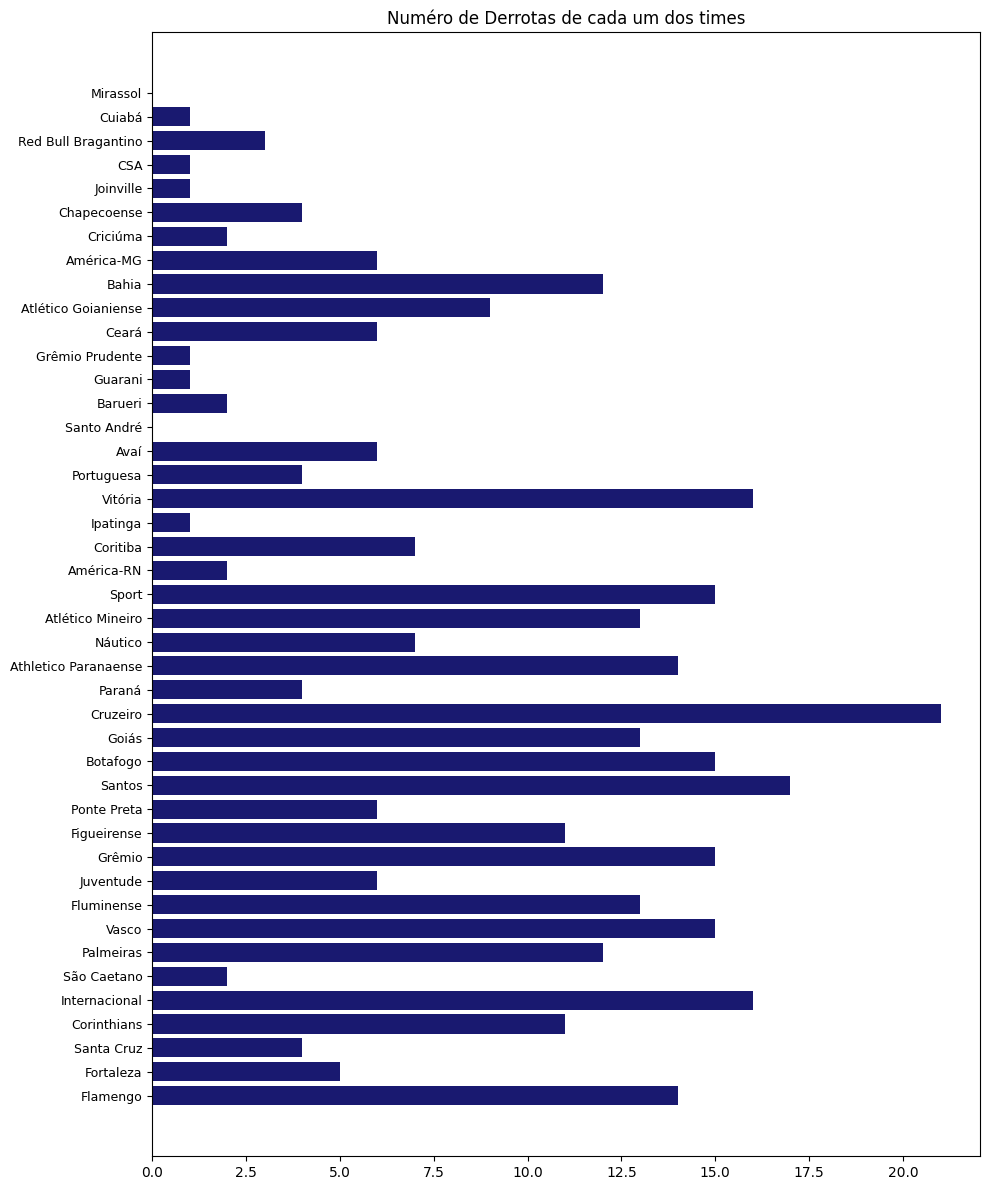

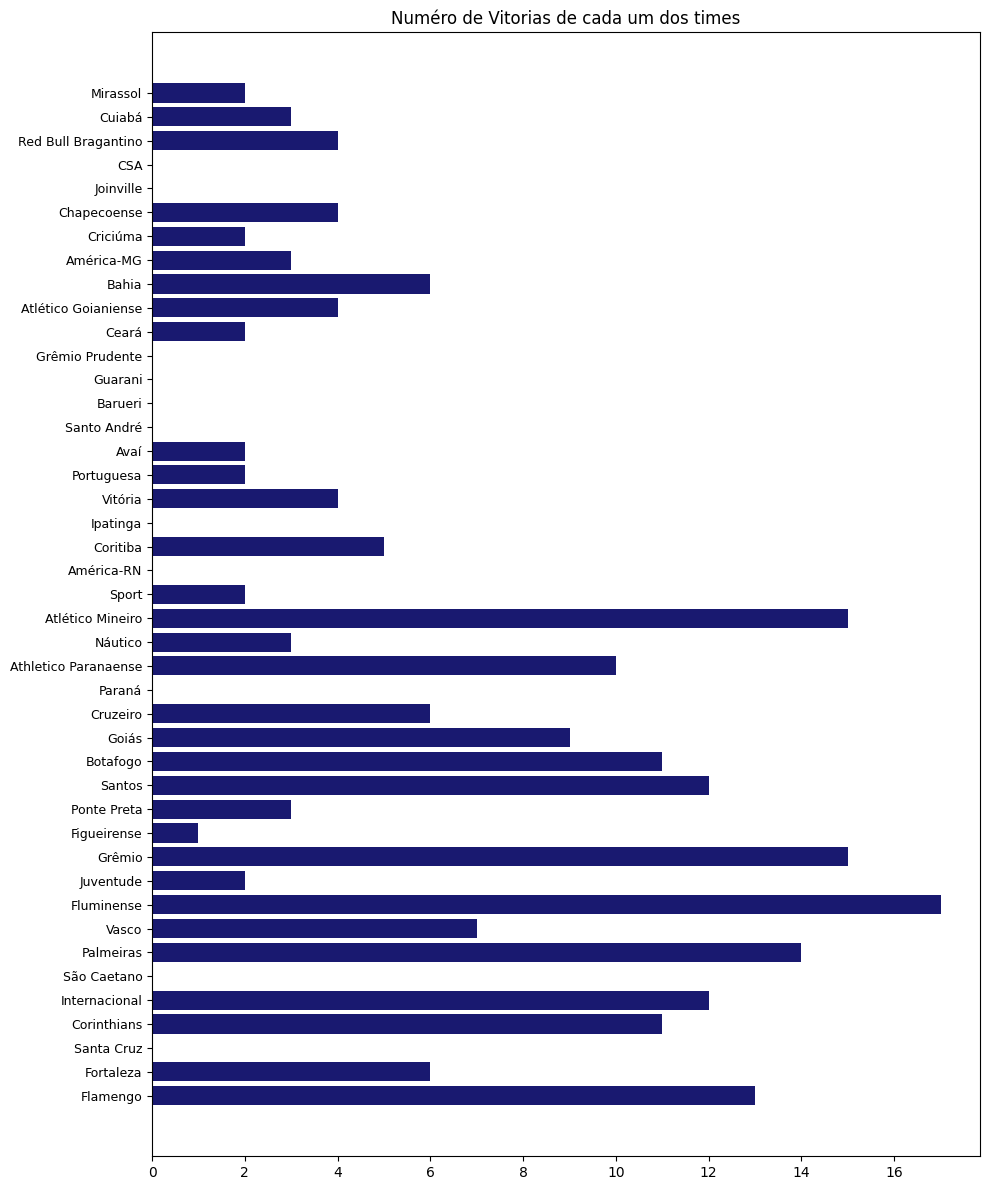

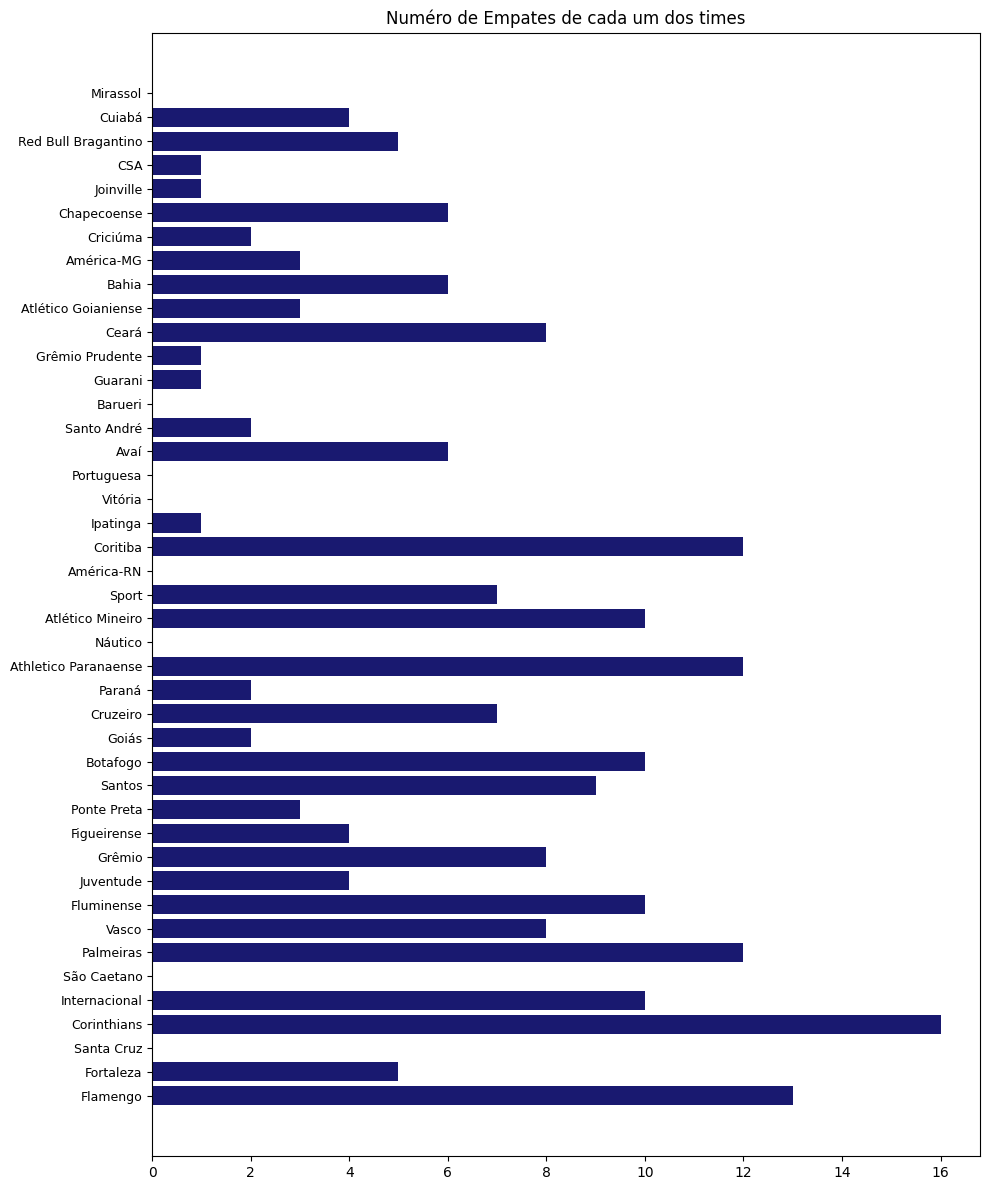

,Time,Disputas,Gols marcados,Gols sofridos,Vitorias,Derrotas,Empates,% Vitórias,% Derrotas,% Empates
0,Flamengo,40,49,50,13,14,13,32.5,35.0,32.5
1,Fortaleza,16,14,14,6,5,5,37.5,31.2,31.2
2,Santa Cruz,4,2,14,0,4,0,0.0,100.0,0.0
3,Corinthians,38,50,45,11,11,16,28.9,28.9,42.1
4,Internacional,38,41,48,12,16,10,31.6,42.1,26.3
5,São Caetano,2,0,2,0,2,0,0.0,100.0,0.0
6,Palmeiras,38,47,40,14,12,12,36.8,31.6,31.6
7,Vasco,30,28,50,7,15,8,23.3,50.0,26.7
8,Fluminense,40,63,46,17,13,10,42.5,32.5,25.0
9,Juventude,12,10,19,2,6,4,16.7,50.0,33.3


Que informações você busca?
Digite 1 para informações sobre um time
Digite 2 para informações gerais
Digite 3 para voltar
3
Digite 1 se quiser informações específicas sobre o SPFC
Digite 2 se quiser informações gerais sobre o SPFC
Digite 3 se quiser informações sobre os adversários
Digite 4 se quiser sair
1

O SPFC tem um total de 760 partidas jogadas, possuindo: 
334 vitórias 
214 empates 
212 de derrotas
marcando um total de 1023 gols e fazendo 1216 pontos.
Sendo campeão nos anos de 2006, 2007 e 2008, o único clube do país a ser tricampeão brasileiro consecutivo!

Qual informação você quer saber?
Digite 1 para saber sobre alguma temporada específica
Digite 2 para saber sobre um intervalo de tempo
Digite 3 para saber em quais cidades jogamos
Digite 4 para voltar
1

Digite um ano entre 2006 e 2025
2017
Digite "casa" para saber os resultados em casa
Digite "visita" para saber os resultados fora
Digite qualquer outro caracter para saber todos os resultados


No ano de 2017 o SPFC 
venceu

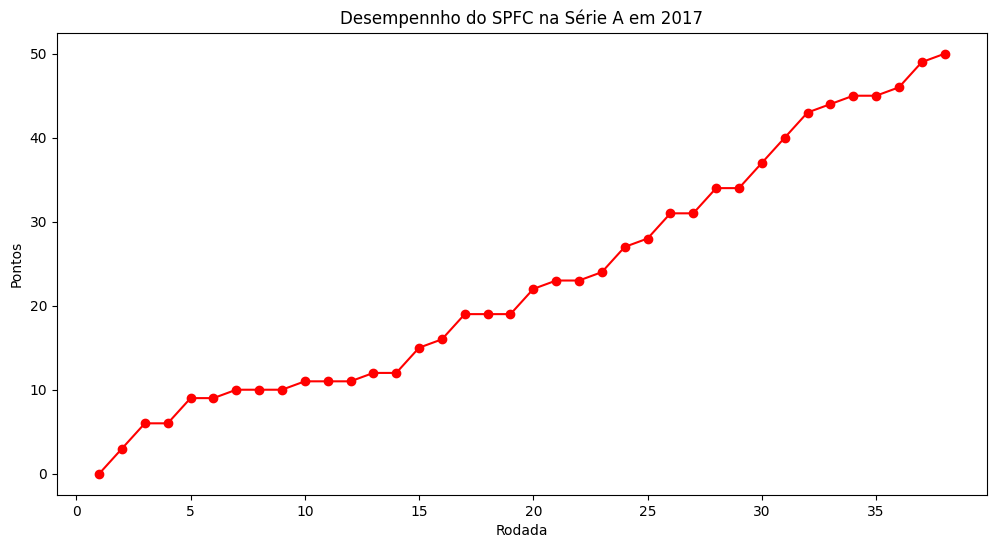

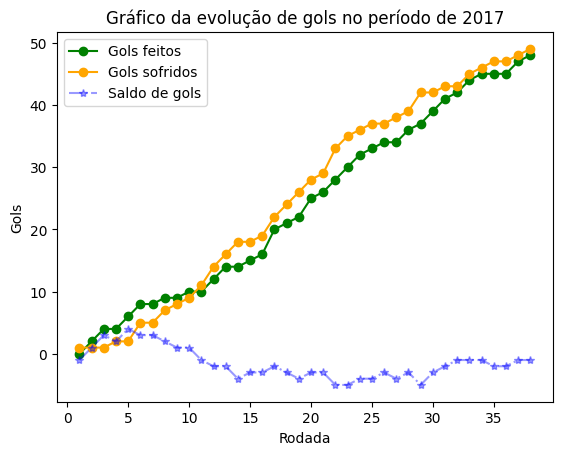

Qual informação a mais você deseja?
Digite 1 para ver a tabela dos jogos
Digite 2 para ver a tabela das vitórias
Digite 3 para ver a tabela dos empates
Digite 4 para ver a tabela das derrotas
Digite 5 para voltar a seleção dos anos
Digite 6 para voltar
1


,rodada,adversario,gols spfc,gols adv,mandante,ano,mês,dia,cidade
0,1,Cruzeiro,0,1,False,2017.0,5,14,Belo Horizonte
1,2,Avaí,2,0,True,2017.0,5,22,São Paulo
2,3,Palmeiras,2,0,True,2017.0,5,28,São Paulo
3,4,Ponte Preta,0,1,False,2017.0,6,4,Campinas
4,5,Vitória,2,0,True,2017.0,6,8,São Paulo
5,6,Corinthians,2,3,False,2017.0,6,11,São Paulo
6,7,Sport,0,0,False,2017.0,6,14,Recife
7,8,Atlético Mineiro,1,2,True,2017.0,6,18,São Paulo
8,9,Athletico Paranaense,0,1,False,2017.0,6,21,Curitiba
9,10,Fluminense,1,1,True,2017.0,6,25,São Paulo


Qual informação a mais você deseja?
Digite 1 para ver a tabela dos jogos
Digite 2 para ver a tabela das vitórias
Digite 3 para ver a tabela dos empates
Digite 4 para ver a tabela das derrotas
Digite 5 para voltar a seleção dos anos
Digite 6 para voltar
6
Qual informação você quer saber?
Digite 1 para saber sobre alguma temporada específica
Digite 2 para saber sobre um intervalo de tempo
Digite 3 para saber em quais cidades jogamos
Digite 4 para voltar
4
Digite 1 se quiser informações específicas sobre o SPFC
Digite 2 se quiser informações gerais sobre o SPFC
Digite 3 se quiser informações sobre os adversários
Digite 4 se quiser sair
4
Obrigado por testar! Até a próxima


In [21]:
main()